In [24]:
import numpy as np
import matplotlib.pyplot as plt
from groupy import *

In [46]:
d=2
n1 = 10
n2 = 10
u1 = np.array([0,1]).reshape(-1,1)
u2 = np.array([1,0]).reshape(-1,1)
s1 = .4
s2 = .4
X = np.hstack([np.random.normal(loc=u1, scale=s1, size = [d,n1]),np.random.normal(loc = u2, scale=s2, size = [d,n2])])

def pmId_Frechet_SDP(X):
    Z = GW_SDP(X)
    evals, evecs = np.linalg.eig(Z)
    eps_sdp = np.sign(evecs[:,0])

    # apply optimal g_i to x_i
    Ysdp = eps_sdp*X
    usdp = np.mean(Ysdp, axis=1)
    
    return usdp

G = CustomFrechet_GroupAction(pmId, 2, pmId_Frechet_SDP)
Y = G.randomize_reps(X)

# kMeans SDP with Quotient Distance

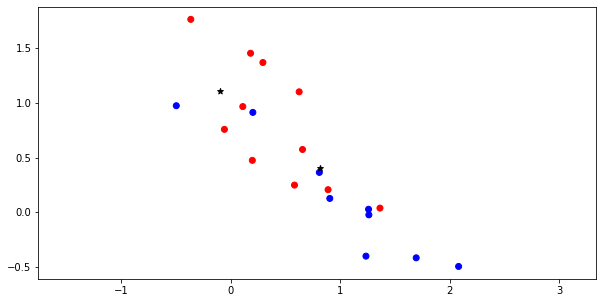

In [47]:
C, classes = G.kmeans_sdp(X,2, 'iterative')


fig = plt.figure(figsize = (10,5))
plt.axis('equal')
plt.scatter(X[0,:], X[1,:], c = classes, cmap='bwr')
plt.scatter(G.align(C[1,:].reshape(-1,1), X[:,0]), G.align(C[0,:].reshape(-1,1), X[:,-1]), color = 'black', marker='*')
plt.show()

# Lloyds exact Frechet Mean Computation

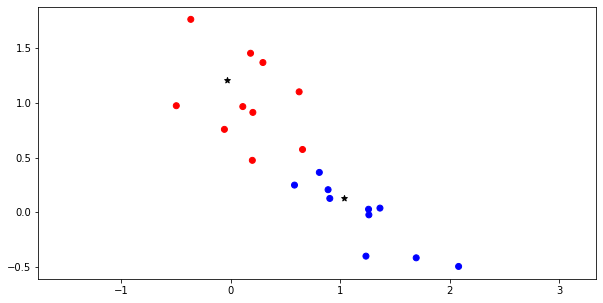

In [48]:
C, classes = G.kmeans(X,2, 'exact')


fig = plt.figure(figsize = (10,5))
plt.axis('equal')
plt.scatter(X[0,:], X[1,:], c = classes, cmap='bwr')
plt.scatter(G.align(C[1,:].reshape(-1,1), X[:,0]), G.align(C[0,:].reshape(-1,1), X[:,-1]), color = 'black', marker='*')
plt.show()

# Lloyds with Gradient Descent

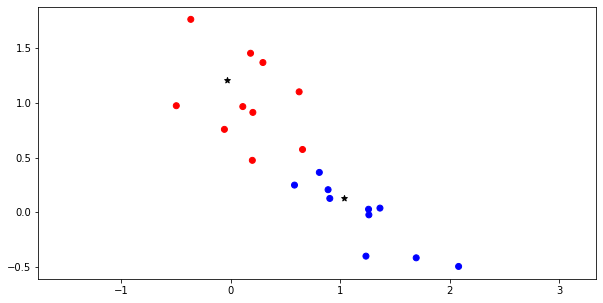

In [49]:
C, classes = G.kmeans(X,2, 'iterative')


fig = plt.figure(figsize = (10,5))
plt.axis('equal')
plt.scatter(X[0,:], X[1,:], c = classes, cmap='bwr')
plt.scatter(G.align(C[1,:].reshape(-1,1), X[:,0]), G.align(C[0,:].reshape(-1,1), X[:,-1]), color = 'black', marker='*')
plt.show()

# Lloyds with SDP for +-Id

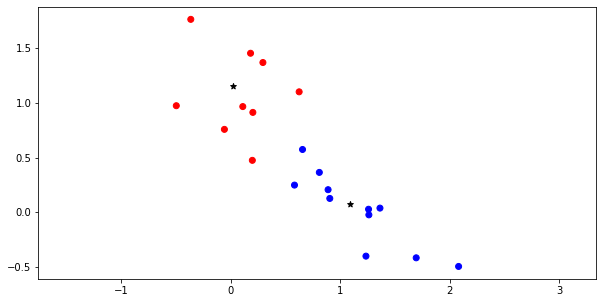

In [50]:
C, classes = G_SDP.kmeans(X, 2, 'custom')

fig = plt.figure(figsize = (10,5))
plt.axis('equal')
plt.scatter(X[0,:], X[1,:], c = classes, cmap='bwr')
plt.scatter(G.align(C[1,:].reshape(-1,1), X[:,0]), G.align(C[0,:].reshape(-1,1), X[:,-1]), color = 'black', marker='*')
plt.show()